# Check number of labels in images

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialize dataframe
index = list(range(1, 20001))
count = np.zeros(20000)
df = pd.DataFrame(index=index, data={'count': count})
df.index.names = ['im_num']

# Get annotation paths ans sort them
paths = glob.glob('../data/annotations/*')
paths = sorted(paths)

# Read annotation files
for annotations_file in paths:
    # Get column name
    name = annotations_file.split("/")[-1].split(".")[0]
    # Read data
    df_tmp = pd.read_csv(annotations_file, delimiter = "\t", names=[name])
    df_tmp = df_tmp.set_index(name)
    # Set column values to 1
    df_tmp[name] = np.ones(len(df_tmp))
    # Add new data to df
    df = df.join(df_tmp)
    
# Replace nan with 0
df = df.fillna(0)

# Calculate count
df["count"] = df.sum(axis=1)

# Values to int
df = df.astype(int)

# Save dataframe
df.to_csv("../data/all_labels.csv")

In [3]:
df

,count,baby,bird,car,clouds,dog,female,flower,male,night,people,portrait,river,sea,tree
im_num,,,,,,,,,,,,,,,
1,3,0,0,0,0,0,1,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Make barplot from number of labels per image

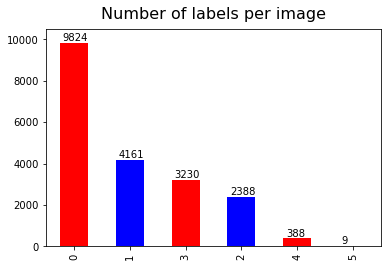

In [4]:
count = df["count"].value_counts().sort_values(ascending=False)
ax = count.plot(kind='bar', color=['r','b']) 

x_offset = -0.2
y_offset = 100
for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.set_ylim(0, 10500)
    ax.set_title("Number of labels per image", fontsize=16, loc="center", pad=10)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
# Save result
fig = plt.gcf()
fig.savefig('../data/label_counts.png')